## Re-simulating the 2022 NBA Finals

### Insert nessesary modules

In [232]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup

import nba_api
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import leaguegamefinder

pd.set_option("display.max_columns", 50)

### Create a teams dictionary

In [233]:
team_dict = teams.get_teams()

In [234]:
Celtics = [team for team in team_dict if team['full_name'] == 'Boston Celtics']
Celtics

[{'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946}]

In [235]:
Warriors = [team for team in team_dict if team['full_name'] == 'Golden State Warriors']
Warriors

[{'id': 1610612744,
  'full_name': 'Golden State Warriors',
  'abbreviation': 'GSW',
  'nickname': 'Warriors',
  'city': 'Golden State',
  'state': 'California',
  'year_founded': 1946}]

### Load in Celtics games and results from nba_api

In [236]:
Celtics_games = leaguegamefinder.LeagueGameFinder(team_id_nullable='1610612738').get_data_frames()[0]
Celtics_games = pd.DataFrame(Celtics_games)
Celtics_games['OPP_PTS'] = Celtics_games['PTS'] - Celtics_games['PLUS_MINUS']
Celtics_games.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPP_PTS
0,42021,1610612738,BOS,Boston Celtics,0042100406,2022-06-16,BOS vs. GSW,L,239,90,34,80,0.425,11,28,0.393,11,12,0.917,11,30,41,27,8,8,22,16,-13.0,103.0
1,42021,1610612738,BOS,Boston Celtics,0042100405,2022-06-13,BOS @ GSW,L,238,94,31,75,0.413,11,32,0.344,21,31,0.677,8,39,47,18,2,2,18,16,-10.0,104.0
2,42021,1610612738,BOS,Boston Celtics,0042100404,2022-06-10,BOS vs. GSW,L,241,97,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,15,17,-10.0,107.0
3,42021,1610612738,BOS,Boston Celtics,0042100403,2022-06-08,BOS vs. GSW,W,240,116,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,16.0,100.0
4,42021,1610612738,BOS,Boston Celtics,0042100402,2022-06-05,BOS @ GSW,L,242,88,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,18,18,-19.0,107.0


In [237]:
Celtics_games.shape

(3690, 29)

In [238]:
# filter data to only include data for 2021-2022 NBA Season
Celtics_2122_games = Celtics_games[Celtics_games['GAME_DATE'] > '2021-09-01']
Celtics_2122_games.shape

(110, 29)

### Load in Warriors games and results from nba_api

In [239]:
Warriors_games = leaguegamefinder.LeagueGameFinder(team_id_nullable='1610612744').get_data_frames()[0]
Warriors_games = pd.DataFrame(Warriors_games)
Warriors_games['OPP_PTS'] = Warriors_games['PTS'] - Warriors_games['PLUS_MINUS']
Warriors_games.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPP_PTS
0,42021,1610612744,GSW,Golden State Warriors,0042100406,2022-06-16,GSW @ BOS,W,241,103,38,92,0.413,19,46.0,0.413,8,8,1.000,15.0,29.0,44.0,27,13,7,15,20,13.0,90.0
1,42021,1610612744,GSW,Golden State Warriors,0042100405,2022-06-13,GSW vs. BOS,W,240,104,41,88,0.466,9,40.0,0.225,13,15,0.867,4.0,35.0,39.0,23,9,2,6,28,10.0,94.0
2,42021,1610612744,GSW,Golden State Warriors,0042100404,2022-06-10,GSW @ BOS,W,241,107,40,91,0.440,15,43.0,0.349,12,15,0.800,16.0,39.0,55.0,20,10,5,16,21,10.0,97.0
3,42021,1610612744,GSW,Golden State Warriors,0042100403,2022-06-08,GSW @ BOS,L,237,100,36,78,0.462,15,40.0,0.375,13,15,0.867,6.0,25.0,31.0,22,7,5,16,23,-16.0,116.0
4,42021,1610612744,GSW,Golden State Warriors,0042100402,2022-06-05,GSW vs. BOS,W,241,107,39,86,0.453,15,37.0,0.405,14,20,0.700,6.0,36.0,42.0,25,15,2,12,17,19.0,88.0


In [240]:
Warriors_games.shape

(3501, 29)

In [241]:
# filter data to only include data for 2021-2022 NBA Season
Warriors_2122_games = Warriors_games[Warriors_games['GAME_DATE'] > '2021-09-01']
Warriors_2122_games.shape

(109, 29)

### Points Scored for each time

<AxesSubplot:xlabel='Points Scored', ylabel='Number of Games'>

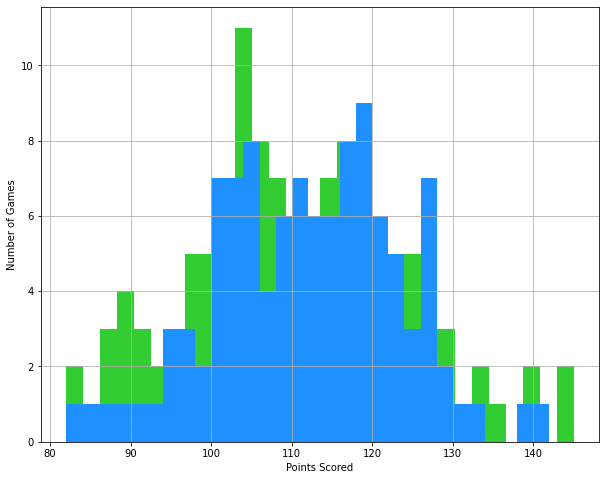

In [242]:
plt.figure(figsize=(10,8))
plt.xlabel('Points Scored')
plt.ylabel('Number of Games')
Celtics_2122_games.PTS.hist(bins=30, color='limegreen')
Warriors_2122_games.PTS.hist(bins=30, color='dodgerblue')

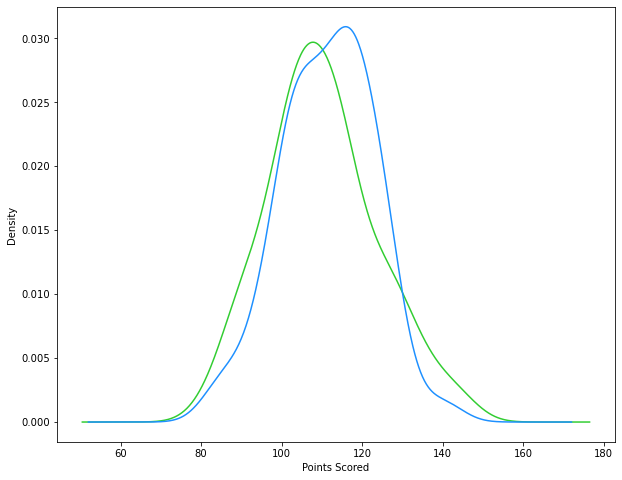

In [243]:
plt.figure(figsize=(10,8))
plt.xlabel('Points Scored')
axCeltics = Celtics_2122_games.PTS.plot.kde(color='limegreen')
axWarriors = Warriors_2122_games.PTS.plot.kde(color='dodgerblue')

### Points allowed for each team

<AxesSubplot:xlabel='Points Allowed', ylabel='Number of Games'>

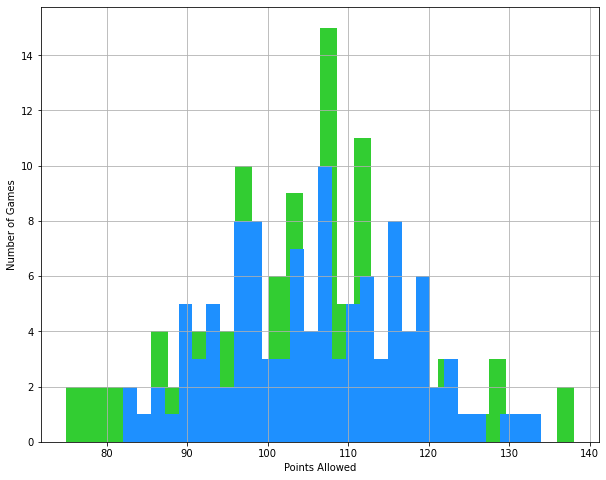

In [244]:
plt.figure(figsize=(10,8))
plt.xlabel('Points Allowed')
plt.ylabel('Number of Games')
Celtics_2122_games.OPP_PTS.hist(bins=30, color='limegreen')
Warriors_2122_games.OPP_PTS.hist(bins=30, color='dodgerblue')

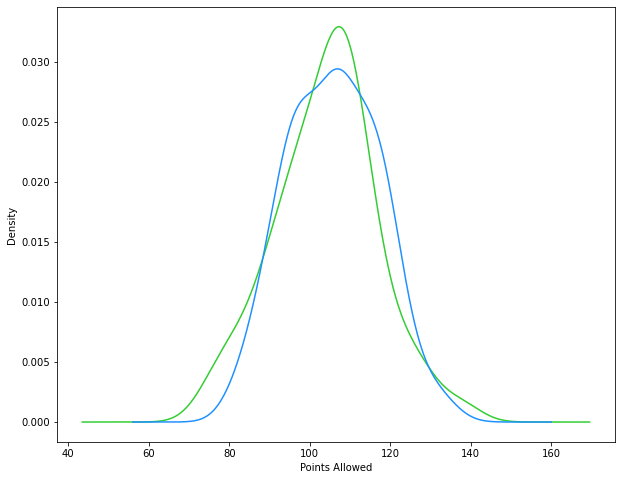

In [245]:
plt.figure(figsize=(10,8))
plt.xlabel('Points Allowed')
axCeltics = Celtics_2122_games.OPP_PTS.plot.kde(color='limegreen')
axWarriors = Warriors_2122_games.OPP_PTS.plot.kde(color='dodgerblue')

### Mean and Standard Deviation for points scored and allowed for each team

In [246]:
WarriorsMeanPoints = Warriors_2122_games.PTS.mean()
CelticsMeanPoints = Celtics_2122_games.PTS.mean()
WarriorsSdPoints = Warriors_2122_games.PTS.std()
CelticsSdPoints = Celtics_2122_games.PTS.std()

WarriorsOppMeanPoints = Warriors_2122_games.OPP_PTS.mean()
CelticsOppMeanPoints = Celtics_2122_games.OPP_PTS.mean()
WarriorsOppSdPoints = Warriors_2122_games.OPP_PTS.std()
CelticsOppSdPoints = Celtics_2122_games.OPP_PTS.std()

print("Warriors Points Scored Mean: ", '%.3f'% WarriorsMeanPoints)
print("Warriors Points Scored SD: ", '%.3f'% WarriorsSdPoints)
print("Celtics Points Scored Mean: ", '%.3f'% CelticsMeanPoints)
print("Celtics Points Scored SD: ", '%.3f'% CelticsSdPoints)
print()
print("Warriors Points Allowed Mean: ", '%.3f'% WarriorsOppMeanPoints)
print("Warriors Points Allowed SD: ", '%.3f'% WarriorsOppSdPoints)
print("Celtics Points Allowed Mean: ", '%.3f'% CelticsOppMeanPoints)
print("Celtics Points Allowed SD: ", '%.3f'% CelticsSdPoints)

Warriors Points Scored Mean:  111.495
Warriors Points Scored SD:  11.452
Celtics Points Scored Mean:  110.091
Celtics Points Scored SD:  13.453

Warriors Points Allowed Mean:  105.835
Warriors Points Allowed SD:  11.322
Celtics Points Allowed Mean:  104.055
Celtics Points Allowed SD:  13.453


### Define Function that simulates a game between Warriors and Celtics

In [247]:
def gameSimulation():
    
    WarScore = (rnd.gauss(WarriorsMeanPoints,WarriorsSdPoints)+ rnd.gauss(CelticsOppMeanPoints,CelticsOppSdPoints))/2
    CelScore = (rnd.gauss(CelticsMeanPoints,CelticsSdPoints)+ rnd.gauss(WarriorsOppMeanPoints,WarriorsOppSdPoints))/2
    
    if int(round(WarScore)) > int(round(CelScore)):
        return 1
    elif int(round(WarScore)) < int(round(CelScore)):
        return -1
    else: return 0

### Define function for how many simulations to run and return winning percentage for each team

In [248]:
# n ~ number of games to simulate

def gameSimulations(n):
    gameResults = []
    WarWins = 0
    CelWins = 0
    Ties = 0
    for i in range(n):
        gm = gameSimulation()
        gameResults.append(gm)
        if gm == 1:
            WarWins += 1
        elif gm == -1:
            CelWins += 1
        else: Ties += 1
            
    WarWinPer = WarWins/(WarWins+CelWins+Ties)*100
    CelWinPer = CelWins/(WarWins+CelWins+Ties)*100
    TiePer = Ties/(WarWins+CelWins+Ties)*100
    
    print('Warriors win ',WarWinPer,'%')
    print('Celtics win ',CelWinPer,'%')
    print('Tie',TiePer,'%')
    
    #return gameResults

In [253]:
gameSimulations(7)

Warriors win  42.857142857142854 %
Celtics win  57.14285714285714 %
Tie 0.0 %


In [254]:
gameSimulations(10)

Warriors win  60.0 %
Celtics win  30.0 %
Tie 10.0 %


In [251]:
gameSimulations(100)

Warriors win  43.0 %
Celtics win  53.0 %
Tie 4.0 %


In [252]:
gameSimulations(1000)

Warriors win  47.4 %
Celtics win  49.9 %
Tie 2.7 %
